# House Sales in King County, USA
dataset obtained from Kaggle: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
## Objective:
### Using multivariate Linear Regression, predict the prices of houses.

# --------------------------------------------------------------------------------------------------


### Importing the relevant libraries

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [45]:
# Making sure that the class variable is on the -1 index and not in the middle of the dataset
dataset = pd.read_csv('kc_house_data.csv')
price = dataset.pop('price')
sqft_lot15 = dataset.pop('sqft_lot15')
dataset['sqft_lot15'] = sqft_lot15
dataset['price'] = price

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]


### Splitting the dataset into the train and test sets.

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------------------------------------------------------------------------------
### Visualizing the data to begin with.

In [47]:
dataset.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [48]:
dataset.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,4.580302e+09,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,5.400881e+05
std,2.876566e+09,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.671272e+05
min,1.000102e+06,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.500000e+04
25%,2.123049e+09,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,3.219500e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [49]:
dataset.select_dtypes(include=[object])

,date
0,20141013T000000
1,20141209T000000
2,20150225T000000
3,20141209T000000
4,20150218T000000
...,...
21608,20140521T000000
21609,20150223T000000
21610,20140623T000000
21611,20150116T000000


Transforming the date "object" into an actual datetime format.

In [50]:
# Removing the 'T000000' present at the end of the strings in the original format
def strip_string(string):
    string = string[:8]
    return string

dataset['date'] = dataset['date'].apply(strip_string)
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y%m%d')
dataset['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

Some quick correlation visualization to get a better idea of what I'm working with

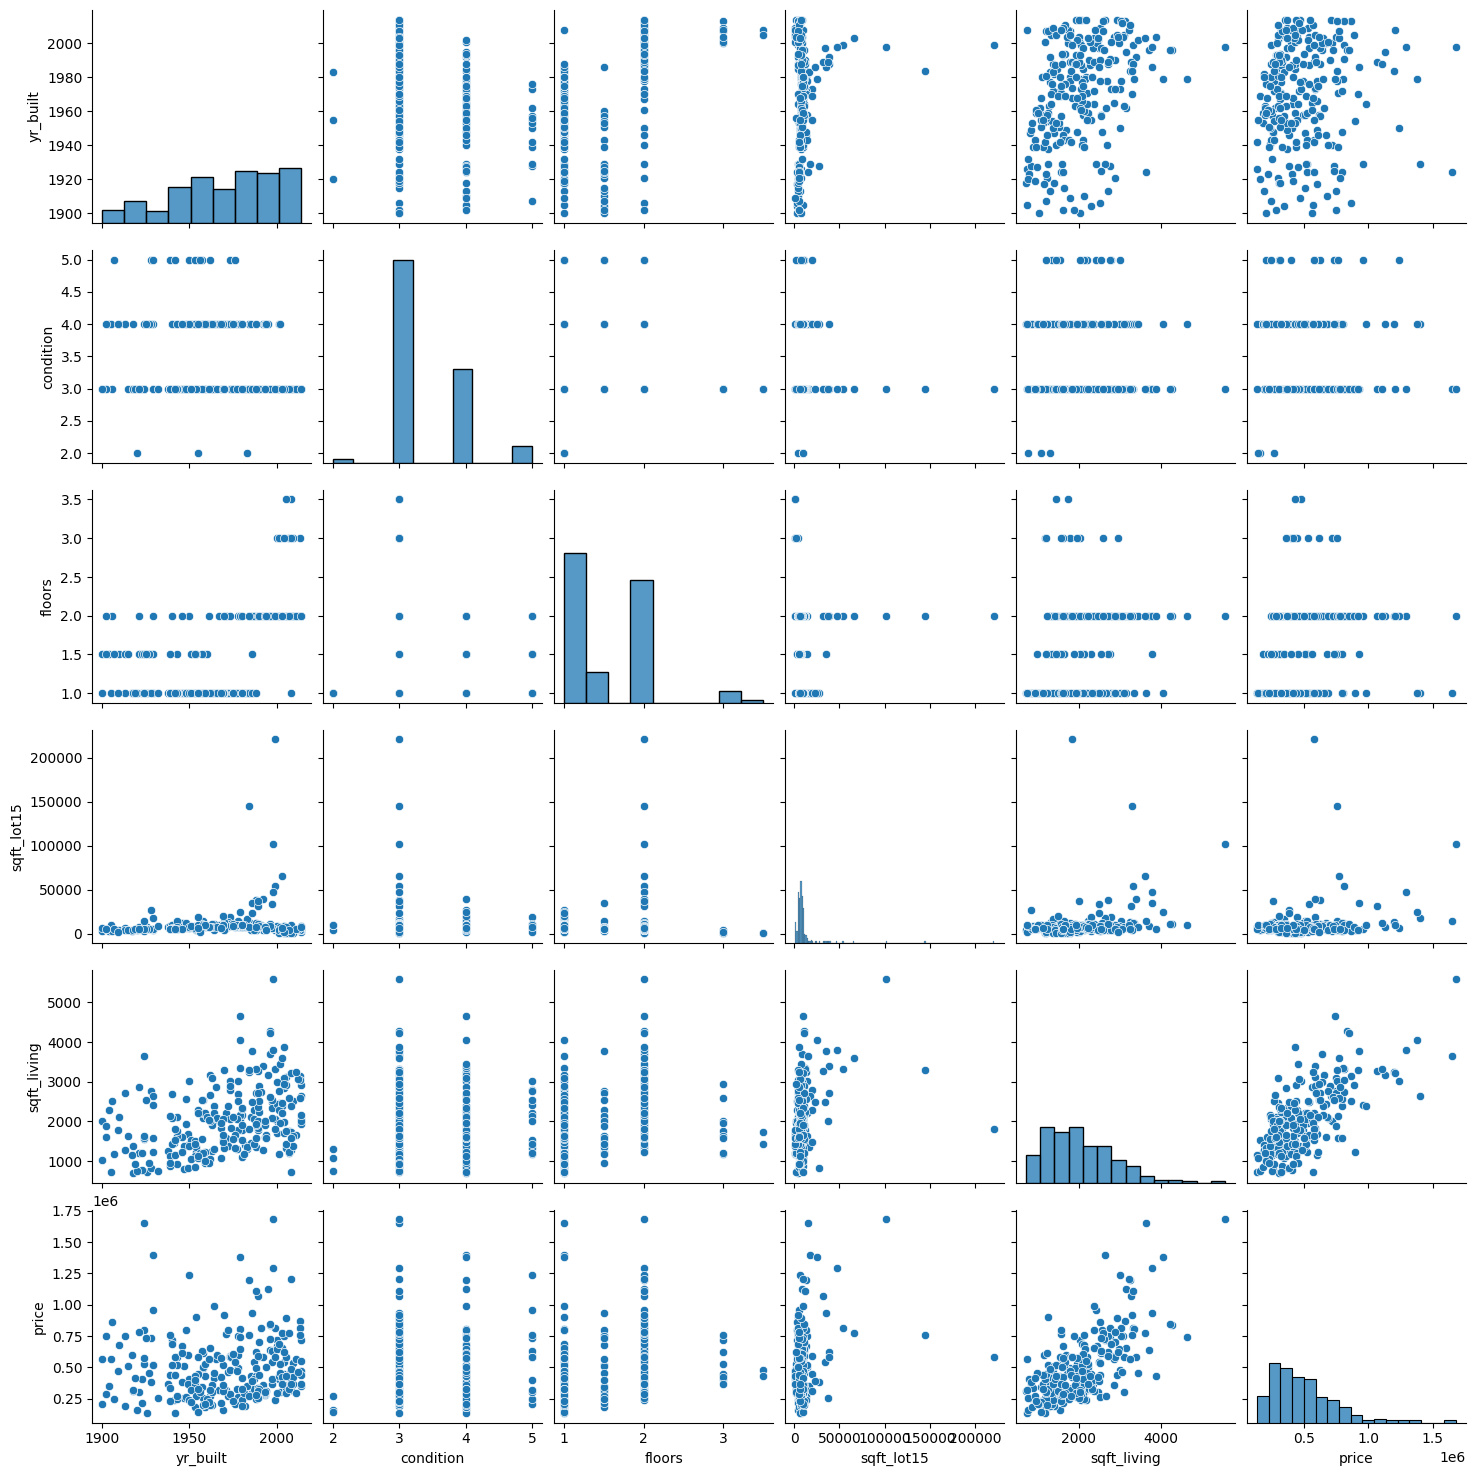

In [61]:
import seaborn as sns
import random
random_indexes = random.sample(range(len(dataset)), 250)
sample_data = dataset.loc[random_indexes, ['yr_built', 'condition', 'floors', 'sqft_lot15', 'sqft_living', 'price']]
sns.pairplot(data=sample_data)

# To be continued:
### next I'm going to remove outliers from the attributes above and a few others. Possibly combine some attributes as well.